In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

import os
import time
import cv2
import numpy as np

X = None
Y = None
X_train = None
X_test = None
y_train = None
y_test = None

In [31]:
def getData():
    global X 
    global Y
    X_sub = []
    Y_sub = []
    fileDir = "faces_4/"
    for subdir, dirs, files in os.walk(fileDir):
        for file in files:
            if file.endswith(".pgm"):
                X_sub.append(np.array(cv2.imread(os.path.abspath(subdir + "/" + file))).flatten())
                if "open" in file:
                    Y_sub.append(np.array(0))
                else:
                    Y_sub.append(np.array(1))
        X = np.array(X_sub)
        Y = np.array(Y_sub)
    
start = time.time()
getData()
print(X.shape)

end = time.time()
print("Total time -> ", (end - start))

(624, 2880)
Total time ->  0.2589852809906006


In [32]:
dictParams = {}
dictParams["learning_rate_init"] = [0.001,0.01, 0.02, 0.1, 1.5]
dictParams["hidden_layer_sizes"] = [[100,100],[120,120],[128,128], [100,100,100], [100,100,100, 128]]
dictParams["alpha"] = [0.0001, 0.02]
dictParams["max_iter"] = [500, 100, 50,20, 60]
dictParams["solver"] = ['adam', 'sgd']

In [33]:
MLP = MLPClassifier()

In [34]:
grid = GridSearchCV(MLP, dictParams, cv=2, scoring='accuracy')

In [35]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [36]:
import time
start = time.time()
grid.fit(X_train, y_train)
end = time.time()
print("Total time -> ", (end - start))

/home/nikhil/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Total time ->  46.23529672622681


In [37]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.767942583732
{'alpha': 0.02, 'hidden_layer_sizes': [100, 100], 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}
MLPClassifier(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100, 100], learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [38]:
MLP = MLPClassifier(learning_rate_init=0.001,hidden_layer_sizes=[100, 100],alpha=0.0001,max_iter=100,solver='adam')
MLP.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100, 100], learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

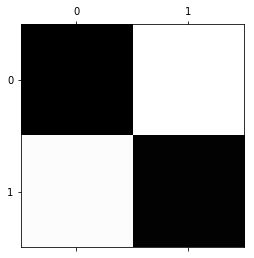

In [39]:
# Confusion Matrix
y_pred = MLP.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmap = plt.cm.gray_r
plt.matshow(cm, cmap=cmap) # imshow
plt.show()

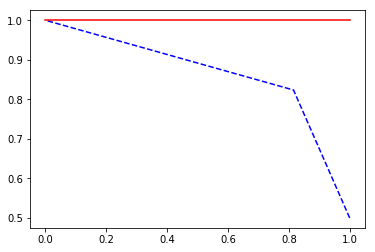

In [45]:
# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
fig, ax = plt.subplots(1, 1)

ax.plot(recall, precision, '--b')
ax.step(recall, decreasing_max_precision, '-r')
plt.show()
